In [352]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [353]:
# Configs
plt.rcParams["figure.figsize"] = (15, 5)
PRODUCT = "PINA_COLADAS"
SYMBOL = "PINA_COLADAS"
start_day = 0
end_day = 3

In [354]:
def prices_files(round: int, start: int, end: int):
    return [f"../data/island-data-bottle-round-{round}/prices_round_{round}_day_{i}.csv" for i in range(start, end+1)]
def trades_files(round: int, start: int, end: int):
    return [f"../data/island-data-bottle-round-{round}/trades_round_{round}_day_{i}_nn.csv" for i in range(start, end+1)]

rd_1_price_files, rd_1_trade_files = prices_files(1, -2, -2), trades_files(1, -2, -2)
rd_2_price_files, rd_2_trade_files = prices_files(2, -1, 1), trades_files(2, -1, 1)

all_price_files = rd_1_price_files + rd_2_price_files
all_trade_files = rd_1_trade_files + rd_2_trade_files

In [355]:
def get_prices_df(product):
    prices_df = pd.concat((pd.read_csv(filename, sep=";", usecols=lambda x: x not in ["day", "profit_and_loss"], index_col=["timestamp"]) for filename in all_price_files), axis="index").query(f"product == '{product}'").reset_index(drop=True)
    prices_df.insert(0, "timestamp", prices_df.index * 100)
    prices_df.set_index("timestamp", inplace=True)
    return prices_df

def get_trades_df(symbol):
    trades_df = pd.concat((pd.read_csv(filename, sep=";", usecols=lambda x : x not in ["buyer", "seller", "currency"], index_col=["timestamp"]) for filename in all_trade_files)).query(f"symbol == '{symbol}'").reset_index(drop=True)
    trades_df.insert(0, "timestamp", trades_df.index)
    trades_df.set_index("timestamp", inplace=True)
    return trades_df

In [356]:
prices_df = get_prices_df(PRODUCT).fillna(0)
prices_df.insert(7, "bid_volume", prices_df["bid_volume_1"] + prices_df["bid_volume_2"] + prices_df["bid_volume_3"])
prices_df.insert(14, "ask_volume", - prices_df["ask_volume_1"] - prices_df["ask_volume_2"] - prices_df["ask_volume_3"])
prices_df["diff_volume"] = prices_df["bid_volume"] + prices_df["ask_volume"]
prices_df

,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,bid_volume,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,ask_volume,mid_price,diff_volume
timestamp,,,,,,,,,,,,,,,,,
0,PINA_COLADAS,14999,38,14998.0,53.0,0.0,0.0,91.0,15001,38,15002.0,53.0,0.0,0.0,-91.0,15000.0,0.0
100,PINA_COLADAS,14999,31,14998.0,64.0,0.0,0.0,95.0,15001,31,15002.0,64.0,0.0,0.0,-95.0,15000.0,0.0
200,PINA_COLADAS,14998,106,0.0,0.0,0.0,0.0,106.0,15001,106,0.0,0.0,0.0,0.0,-106.0,14999.5,0.0
300,PINA_COLADAS,14999,35,14998.0,67.0,0.0,0.0,102.0,15001,35,15002.0,67.0,0.0,0.0,-102.0,15000.0,0.0
400,PINA_COLADAS,14998,38,14997.0,69.0,0.0,0.0,107.0,15000,38,15001.0,69.0,0.0,0.0,-107.0,14999.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999500,PINA_COLADAS,14849,103,0.0,0.0,0.0,0.0,103.0,14852,34,14853.0,69.0,0.0,0.0,-103.0,14850.5,0.0
2999600,PINA_COLADAS,14853,3,14852.0,66.0,0.0,0.0,69.0,14855,34,14856.0,66.0,0.0,0.0,-100.0,14854.0,-31.0
2999700,PINA_COLADAS,14850,29,14849.0,105.0,0.0,0.0,134.0,14852,105,0.0,0.0,0.0,0.0,-105.0,14851.0,29.0


In [357]:
trades_df = get_trades_df(SYMBOL)
trades_df = trades_df[trades_df['price'] != 0]
trades_df

,symbol,price,quantity
timestamp,,,
0,PINA_COLADAS,15015.0,4
1,PINA_COLADAS,15011.0,6
2,PINA_COLADAS,15027.0,4
3,PINA_COLADAS,15025.0,8
4,PINA_COLADAS,15036.0,30
...,...,...,...
849,PINA_COLADAS,14854.0,22
850,PINA_COLADAS,14854.0,9
851,PINA_COLADAS,14853.0,10


In [358]:
def time_at(day_in_df: int):
    return day_in_df * 1000000

def prices_on_day(start: int, end: int):
    new_df = prices_df.loc[time_at(start) : time_at(end)].copy()
    return new_df

def trades_on_day(start: int, end: int):
    trades_per_day = int(trades_df.shape[0] / end) # number of trades per day
    return trades_df.loc[trades_per_day * start : trades_per_day * end].copy()

In [359]:
prices_df = prices_on_day(start_day, end_day)
prices_df

,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,bid_volume,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,ask_volume,mid_price,diff_volume
timestamp,,,,,,,,,,,,,,,,,
0,PINA_COLADAS,14999,38,14998.0,53.0,0.0,0.0,91.0,15001,38,15002.0,53.0,0.0,0.0,-91.0,15000.0,0.0
100,PINA_COLADAS,14999,31,14998.0,64.0,0.0,0.0,95.0,15001,31,15002.0,64.0,0.0,0.0,-95.0,15000.0,0.0
200,PINA_COLADAS,14998,106,0.0,0.0,0.0,0.0,106.0,15001,106,0.0,0.0,0.0,0.0,-106.0,14999.5,0.0
300,PINA_COLADAS,14999,35,14998.0,67.0,0.0,0.0,102.0,15001,35,15002.0,67.0,0.0,0.0,-102.0,15000.0,0.0
400,PINA_COLADAS,14998,38,14997.0,69.0,0.0,0.0,107.0,15000,38,15001.0,69.0,0.0,0.0,-107.0,14999.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999500,PINA_COLADAS,14849,103,0.0,0.0,0.0,0.0,103.0,14852,34,14853.0,69.0,0.0,0.0,-103.0,14850.5,0.0
2999600,PINA_COLADAS,14853,3,14852.0,66.0,0.0,0.0,69.0,14855,34,14856.0,66.0,0.0,0.0,-100.0,14854.0,-31.0
2999700,PINA_COLADAS,14850,29,14849.0,105.0,0.0,0.0,134.0,14852,105,0.0,0.0,0.0,0.0,-105.0,14851.0,29.0


In [360]:
trades_df = trades_on_day(start_day, end_day)

In [361]:
trades_df.describe()

,price,quantity
count,853.000000,853.000000
mean,15019.178195,10.012896
std,111.246242,8.939603
min,14796.000000,1.000000
25%,14905.000000,4.000000
50%,15041.000000,6.000000
75%,15108.000000,13.000000
max,15242.000000,39.000000


<Axes: xlabel='timestamp'>

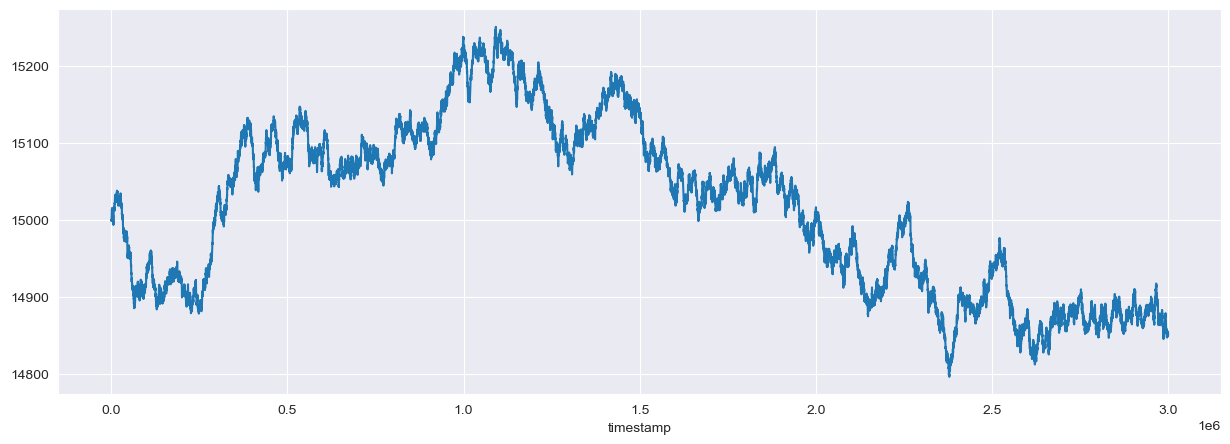

In [362]:
prices_df["mid_price"].plot()

<Axes: xlabel='timestamp'>

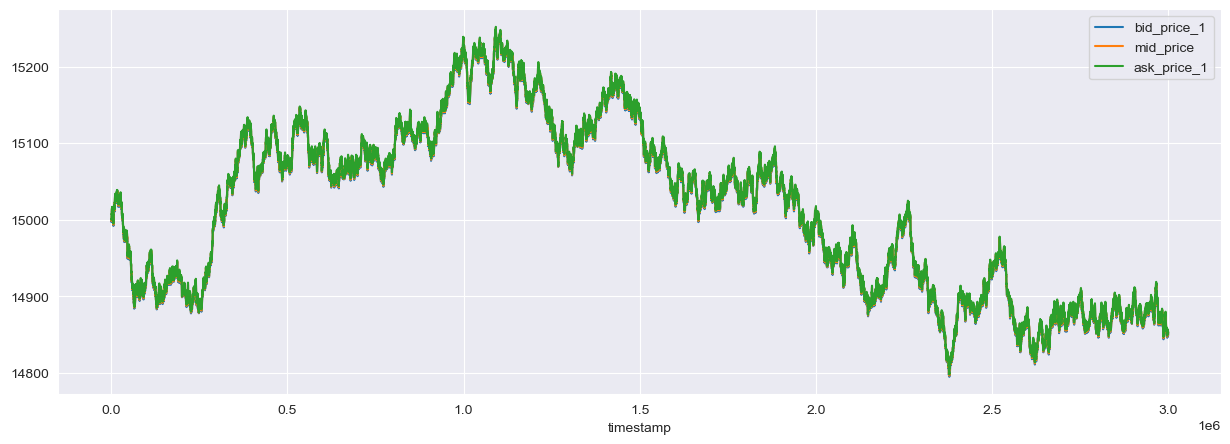

In [363]:
prices_df[["bid_price_1", "mid_price", "ask_price_1"]].plot()

<Axes: xlabel='timestamp'>

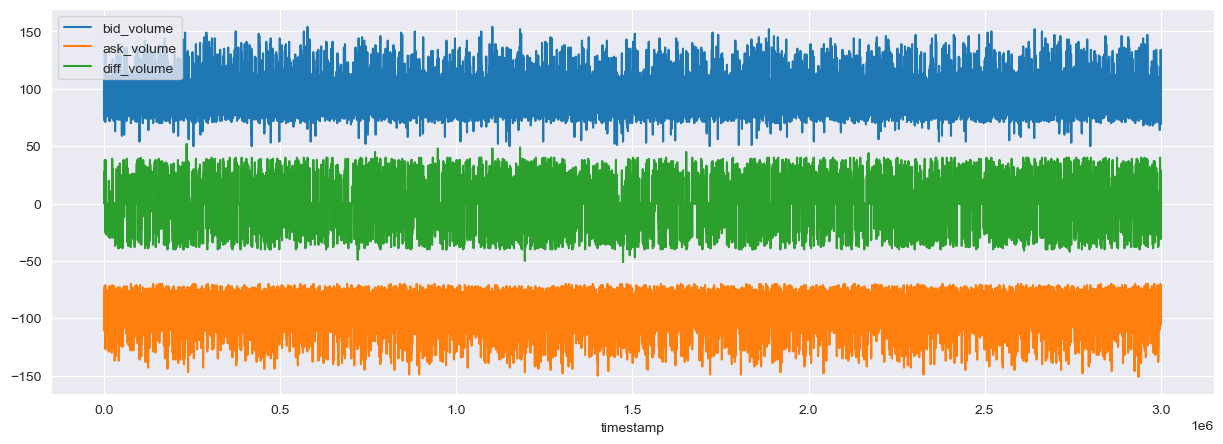

In [364]:
volumes = prices_df[["bid_volume", "ask_volume", "diff_volume"]]
volumes.plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

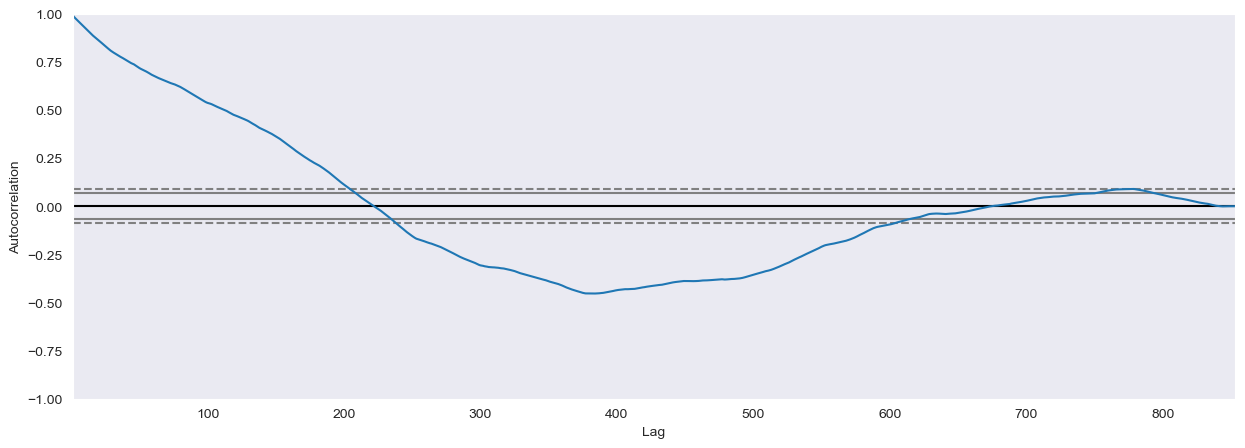

In [365]:
# Used to check randomness. If it's flat then it's random, otherwise 95% or 99% not.
pd.plotting.autocorrelation_plot(trades_df["price"])

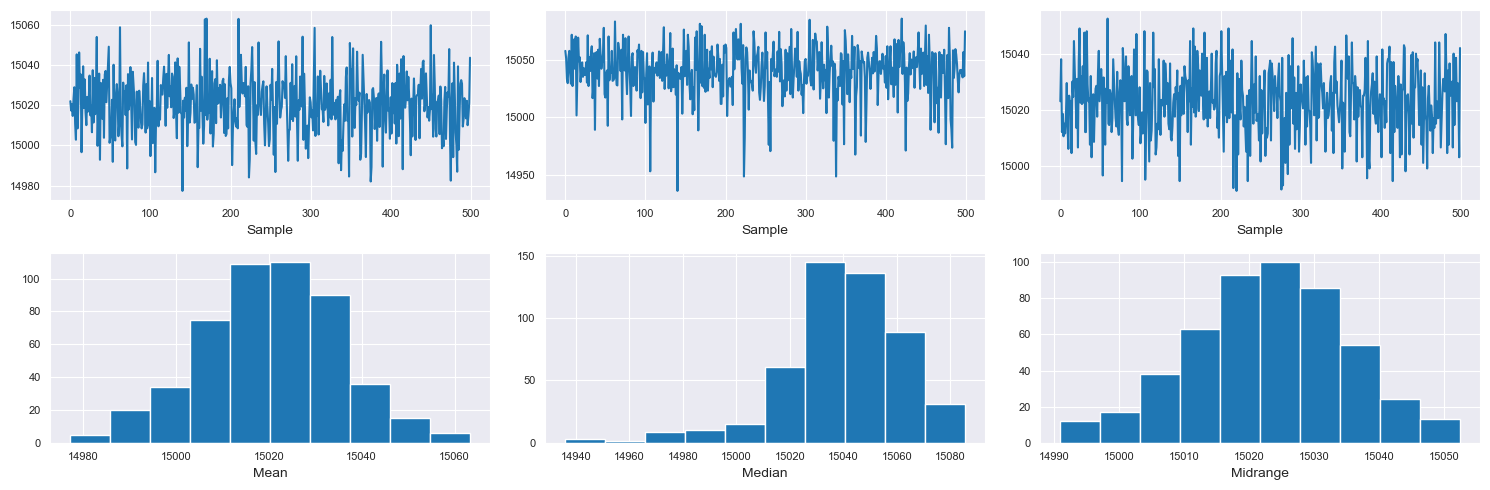

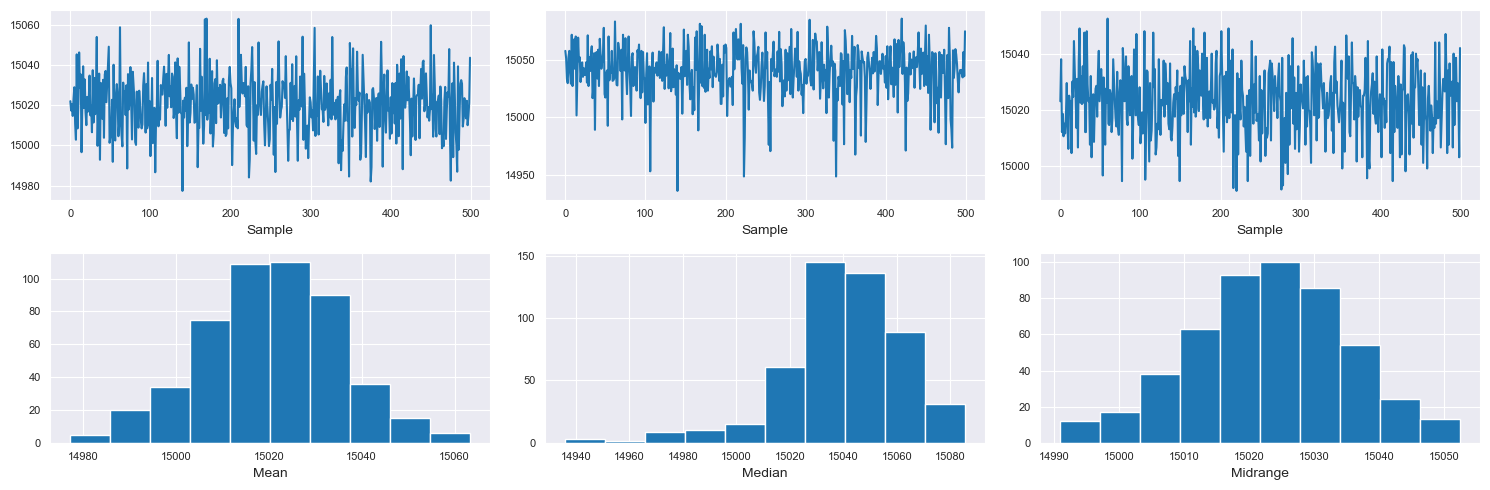

In [368]:
pd.plotting.bootstrap_plot(trades_df["price"])

KeyError: 'Name'

<Figure size 1500x500 with 0 Axes>

array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>],
      dtype=object)

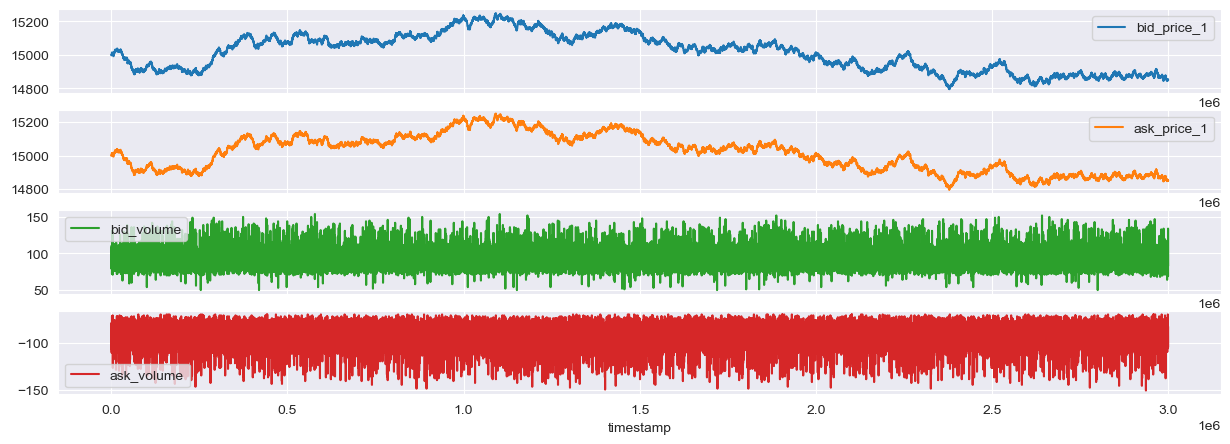

In [366]:
prices_df[["bid_price_1", "ask_price_1", "bid_volume", "ask_volume"]].plot(subplots=True)